<a href="https://colab.research.google.com/github/Ahmed-Shatla/Predicting-disaster-tweets-using-LSTM/blob/main/AMIT_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1)Load the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv("train.csv")


#2)Check head and info of the data

In [ ]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


#3) Is there a missing data [how many and the percentage if there]?

In [ ]:
train_data.shape

(7613, 5)

In [ ]:
total_missing_values = train_data.isna().sum().sum()
##number of missing values
total_missing_values

2594

In [ ]:
percentage_of_missing_valeus = (total_missing_values/train_data.shape[0])*100
##percentage of nulls
percentage_of_missing_valeus

34.073295678444765

#4) How many data in each class?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


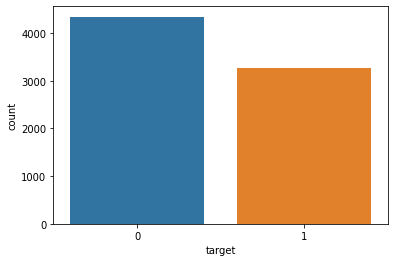

In [ ]:
sns.countplot(train_data['target'])

#5) Get the top 15 locations of the data

In [ ]:
train_data['location'].value_counts().head(15)

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Australia           18
Chicago, IL         18
Name: location, dtype: int64

In [ ]:
train_data['location'].mode()

0    USA
dtype: object

In [ ]:
train_data['location'].fillna('USA',inplace=True)

In [ ]:
train_data['location'].value_counts().head(15)

USA                2637
New York             71
United States        50
London               45
Canada               29
Nigeria              28
UK                   27
Los Angeles, CA      26
India                24
Mumbai               22
Washington, DC       21
Kenya                20
Worldwide            19
Australia            18
Chicago, IL          18
Name: location, dtype: int64

#6) Get the top 15 keyword in the data

In [ ]:
train_data['keyword'].value_counts().head(15)

fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
outbreak       40
evacuate       40
fear           40
collided       40
siren          40
twister        40
windstorm      40
sinkhole       39
Name: keyword, dtype: int64

In [ ]:
train_data['keyword'].fillna('fatalities',inplace=True)

In [ ]:
train_data['keyword'].value_counts().head(15)

fatalities     106
deluge          42
armageddon      42
damage          41
harm            41
body%20bags     41
sinking         41
siren           40
evacuate        40
fear            40
outbreak        40
twister         40
windstorm       40
collided        40
sunk            39
Name: keyword, dtype: int64

#7) What are the most common words?

####cleaning tweets

In [ ]:
import re
tweets = train_data['text']
for i in range(1,10,1):
  print(tweets[i])


Forest fire near La Ronge Sask. Canada
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
13,000 people receive #wildfires evacuation orders in California 
Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 
#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas
I'm on top of the hill and I can see a fire in the woods...
There's an emergency evacuation happening now in the building across the street
I'm afraid that the tornado is coming to our area...


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
